### Table of Contents:
* [1. Feature selection and improve accuracy of data mining results ](#1)
* &emsp;[1.1. Importing Libraries](#11)
* &emsp;[1.2. Converting categorical data to numerical](#12)
* &emsp;[1.3. Correlation Matrix](#13)
* &emsp;[1.4. Heat-Map of correlation Matrix](#14)
* &emsp;[1.5. Relevant attributes to improve the accuracy of data mining results](#15)

# 1. Feature selection and improve accuracy of data mining results <a class="anchor" id="1"></a>

Select relevant attributes from your dataset to improve the accuracy of data mining results. 

## 1.1. Importing Libraries <a class="anchor" id="11"></a>

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

## 1.2. Converting categorical data to numerical <a class="anchor" id="12"></a>

In [2]:
df = pd.read_csv('data/training_data.csv')

In [3]:
categorical_features = ['company','country','director','genre','released','year',
                        'writer','original_title','tagline','title','genres_edited','production_countries_edited',]
continuous_features = ['budget','runtime','votes','popularity']
normalized_features = [e+'_norm' for e in continuous_features]
target_features = ['isprofit','profitability_ratio']
all_features = categorical_features + continuous_features + normalized_features + target_features

In [5]:
df['company']=df['company'].astype('category').cat.codes
df['country']=df['country'].astype('category').cat.codes
df['director']=df['director'].astype('category').cat.codes
df['genre']=df['genre'].astype('category').cat.codes
#df['rating']=df['rating'].astype('category').cat.codes
#df['star']=df['star'].astype('category').cat.codes
df['writer']=df['writer'].astype('category').cat.codes

## 1.3. Correlation Matrix <a class="anchor" id="13"></a>

In [6]:
corr_df=df[all_features].corr()

In [7]:
corr_df

,company,country,director,genre,year,writer,budget,runtime,votes,popularity,budget_norm,runtime_norm,votes_norm,popularity_norm,isprofit,profitability_ratio
company,1.000000,-0.009867,0.006895,-0.075781,-0.023966,0.009364,0.090862,0.006013,0.009733,0.047951,0.090862,0.006013,0.009733,0.047951,0.015977,0.017564
country,-0.009867,1.000000,0.020983,-0.005500,-0.076603,-0.017457,0.059658,-0.055972,0.007854,0.007070,0.059658,-0.055972,0.007854,0.007070,0.132153,0.157624
director,0.006895,0.020983,1.000000,0.060571,-0.001463,0.122272,-0.001560,0.065903,0.060033,0.040494,-0.001560,0.065903,0.060033,0.040494,-0.013569,0.016749
genre,-0.075781,-0.005500,0.060571,1.000000,0.026985,0.004984,-0.279989,0.031992,-0.104438,-0.136834,-0.279989,0.031992,-0.104438,-0.136834,0.029456,0.048699
year,-0.023966,-0.076603,-0.001463,0.026985,1.000000,-0.005757,0.235715,-0.010598,0.303022,0.217263,0.235715,-0.010598,0.303022,0.217263,-0.048307,-0.112542
writer,0.009364,-0.017457,0.122272,0.004984,-0.005757,1.000000,-0.035539,-0.006226,0.002678,-0.014209,-0.035539,-0.006226,0.002678,-0.014209,-0.005641,0.031581
budget,0.090862,0.059658,-0.001560,-0.279989,0.235715,-0.035539,1.000000,0.256446,0.380841,0.341254,1.000000,0.256446,0.380841,0.341254,-0.072391,-0.134602
runtime,0.006013,-0.055972,0.065903,0.031992,-0.010598,-0.006226,0.256446,1.000000,0.214776,0.130715,0.256446,1.000000,0.214776,0.130715,-0.031915,-0.039720
votes,0.009733,0.007854,0.060033,-0.104438,0.303022,0.002678,0.380841,0.214776,1.000000,0.508494,0.380841,0.214776,1.000000,0.508494,0.283544,0.270237
popularity,0.047951,0.007070,0.040494,-0.136834,0.217263,-0.014209,0.341254,0.130715,0.508494,1.000000,0.341254,0.130715,0.508494,1.000000,0.183573,0.178680


## 1.4. Heat-Map of correlation Matrix <a class="anchor" id="14"></a>

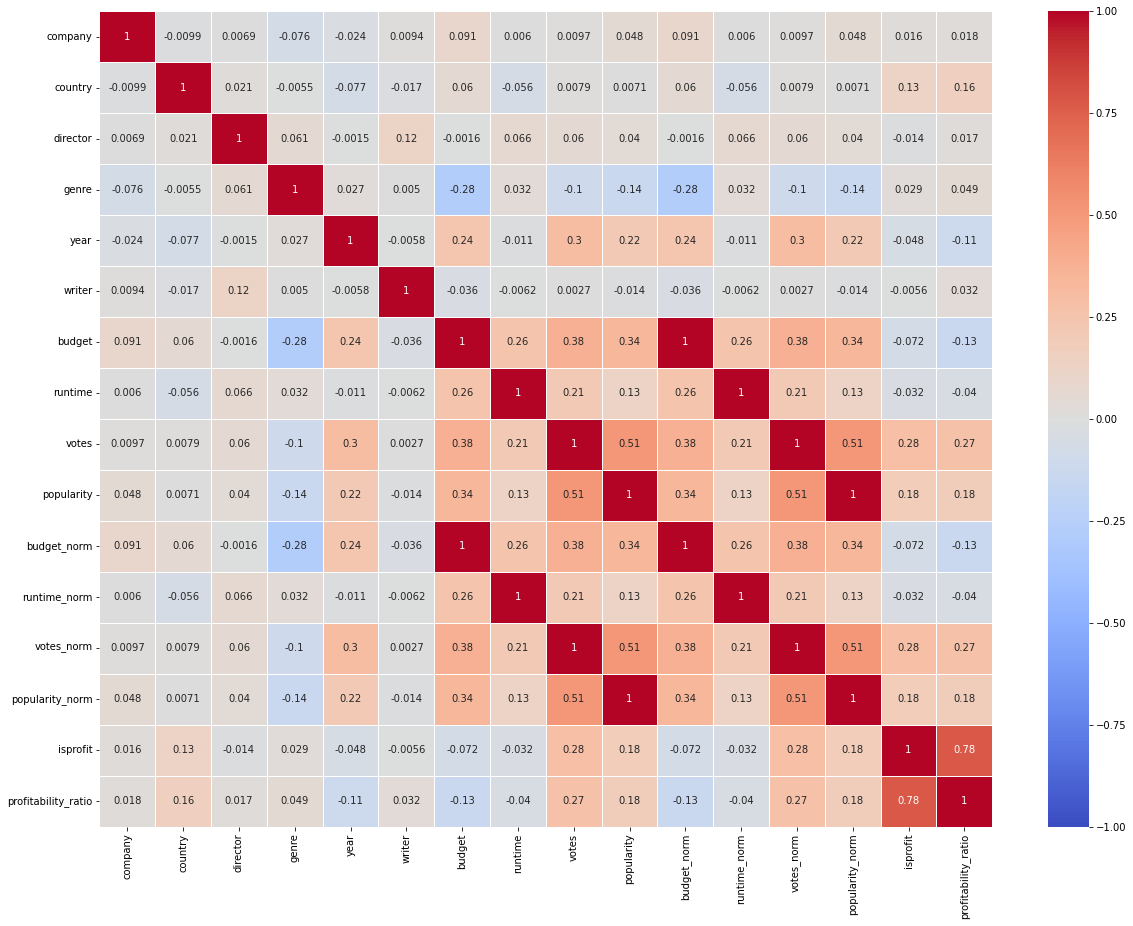

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_df,cmap='coolwarm',vmin=-1, vmax=1,annot=True,linewidth=.5);


## 1.5. Relevant attributes to improve the accuracy of data mining results <a class="anchor" id="15"></a>

In [9]:
corr_df_features = set()
for i in range(len(corr_df.columns)-2):
    if corr_df.iloc[i,14]<-0.04 or corr_df.iloc[i,14]>0.04 or \
        corr_df.iloc[i,15]<-0.04 or corr_df.iloc[i,15]>0.04:
        corr_df_features.add(corr_df.columns[i])

In [10]:
corr_df_features

{'budget',
 'budget_norm',
 'country',
 'genre',
 'popularity',
 'popularity_norm',
 'votes',
 'votes_norm',
 'year'}

In [11]:
df[list(corr_df_features)+['isprofit','profitability_ratio']].to_csv('data/final_training_data.csv')